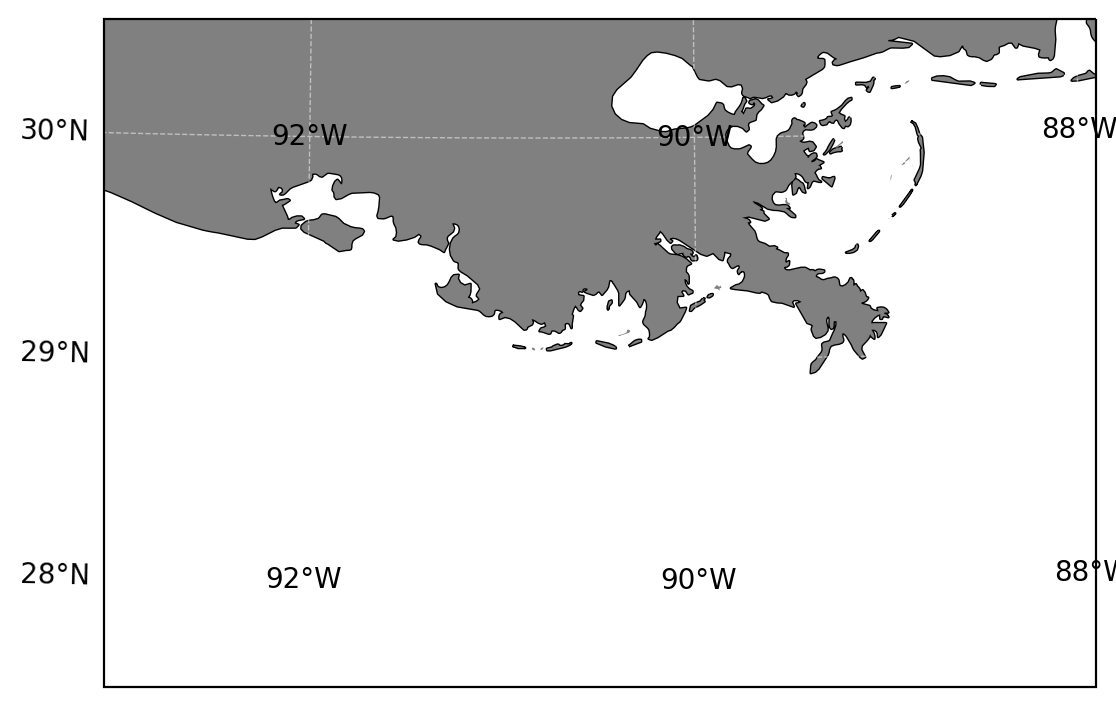

In [7]:
from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from satpy import MultiScene
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr


######

lat_0, lon_0 = 28.5, -90.8

lat_top=30.5
lat_bot=27.5
lon_left=-88
lon_rigth=-93



extent=[lon_left, lon_rigth, lat_bot, lat_top]
resval = 1000
res = xr.DataArray(resval, attrs={"units": "meters"})

def plot_mapbase(extent=extent, res='10m', projection=ccrs.PlateCarree(), ax=None):
    if ax is None:
        fig = plt.figure(dpi=200) # set fig size
        ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res))
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                 ylocs=[28, 29, 30], 
                 xlocs=[-94, -92, -90, -88], 
                 draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--')
    gl.right_labels = False
    gl.top_labels = False
    return ax

mapbase = plot_mapbase(projection= ccrs.LambertConformal(central_longitude=lon_0, central_latitude=lat_0))

########
        
        
def Monthfigure(month):
    
    i=0
#     base = glob('/home/hboi-ouri/Projects/RS_Files/Task4/2022/' + month + '_MODIS_L2_aCDOM.nc')   
    base = glob('/home/hboi-ouri/Projects/RS_Files/Task4/'+month+'*aCDOM.nc')   

    #area in the figure
    extent = [-94, 27.5, -88, 30.5]
    my_area = create_area_def('my_area', {'proj': 'lcc', 'lon_0': -91., 'lat_0': 29.5, 'lat_1': 29.5, 'lat_2': 29.5},
                    width=1500, height=750,
                    area_extent=extent, units='degrees')
        
    fig =  plt.figure(figsize=(6, 4), dpi=200)



    print(base)
    ds = xr.open_dataset(base[0])
    data = ds.acdom.mean('time')
    ax1 = plt.subplot(projection=ccrs.PlateCarree())
    im = data.where(data!=0).plot(ax=ax1, vmin=0, vmax=15, x='lon', y='lat', add_colorbar=False) #transform=projection)
    ax1.set_title('Test', fontsize=8)


    fig.colorbar(im, fraction=0.042, pad=0.06)

    fig.text(0.834, 0.43, 'Counts', size=13, rotation=90)


    plot_mapbase(ax=ax1)




    #title & save
    ax1.set_title('MODIS AQUA - GOMEX aCDOM; ' + month)
    fig.text(0.02, 0.42, 'Latitude', size=13, rotation=90)
    fig.text(0.4, 0.09, 'Longitude', size=13)
    fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task7/aCDOM' + month + '.png')
    fig.clear()
        


In [8]:
directory = glob('/home/hboi-ouri/Projects/RS_Files/MODISGrids/2021-2022/*')
for period in directory:
    month = (period[-7:])
    print(month)
    Monthfigure(month)


JUN2021
['/home/hboi-ouri/Projects/RS_Files/Task4/JUN2021_MODIS_L2_aCDOM.nc']
DEC2022
['/home/hboi-ouri/Projects/RS_Files/Task4/DEC2022_MODIS_L2_aCDOM.nc']
NOV2021
['/home/hboi-ouri/Projects/RS_Files/Task4/NOV2021_MODIS_L2_aCDOM.nc']
FEB2021
['/home/hboi-ouri/Projects/RS_Files/Task4/FEB2021_MODIS_L2_aCDOM.nc']
AUG2021
['/home/hboi-ouri/Projects/RS_Files/Task4/AUG2021_MODIS_L2_aCDOM.nc']
OCT2022
['/home/hboi-ouri/Projects/RS_Files/Task4/OCT2022_MODIS_L2_aCDOM.nc']
MAR2021
['/home/hboi-ouri/Projects/RS_Files/Task4/MAR2021_MODIS_L2_aCDOM.nc']
APR2021
['/home/hboi-ouri/Projects/RS_Files/Task4/APR2021_MODIS_L2_aCDOM.nc']
MAY2021
['/home/hboi-ouri/Projects/RS_Files/Task4/MAY2021_MODIS_L2_aCDOM.nc']
SEP2021
['/home/hboi-ouri/Projects/RS_Files/Task4/SEP2021_MODIS_L2_aCDOM.nc']
OCT2021
['/home/hboi-ouri/Projects/RS_Files/Task4/OCT2021_MODIS_L2_aCDOM.nc']
JAN2021
['/home/hboi-ouri/Projects/RS_Files/Task4/JAN2021_MODIS_L2_aCDOM.nc']
APR2022
['/home/hboi-ouri/Projects/RS_Files/Task4/APR2022_MODIS_

/tmp/ipykernel_7034/655225580.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig =  plt.figure(figsize=(6, 4), dpi=200)


JUN2022
['/home/hboi-ouri/Projects/RS_Files/Task4/JUN2022_MODIS_L2_aCDOM.nc']
AUG2022
['/home/hboi-ouri/Projects/RS_Files/Task4/AUG2022_MODIS_L2_aCDOM.nc']
DEC2021
['/home/hboi-ouri/Projects/RS_Files/Task4/DEC2021_MODIS_L2_aCDOM.nc']


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

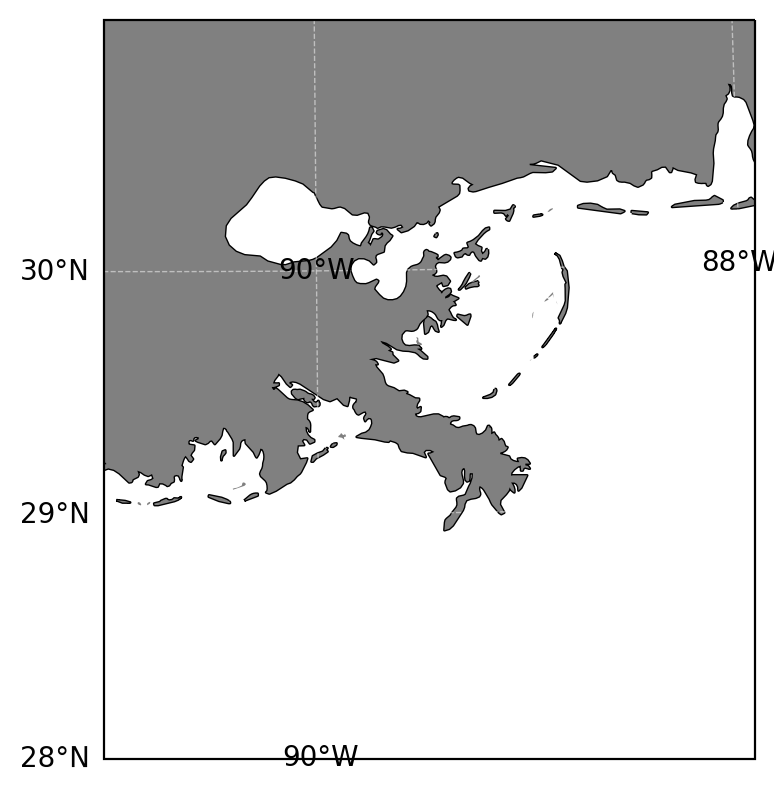

In [3]:
from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from satpy import MultiScene
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr


######

lat_0, lon_0 = 28.5, -90.8

lat_top=31
lat_bot=28
lon_left=-88
lon_rigth=-91



extent=[lon_left, lon_rigth, lat_bot, lat_top]
resval = 1000
res = xr.DataArray(resval, attrs={"units": "meters"})

def plot_mapbase(extent=extent, res='10m', projection=ccrs.PlateCarree(), ax=None):
    if ax is None:
        fig = plt.figure(dpi=200) # set fig size
        ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res))
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                 ylocs=[28, 29, 30], 
                 xlocs=[-94, -92, -90, -88], 
                 draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--')
    gl.right_labels = False
    gl.top_labels = False
    return ax

mapbase = plot_mapbase(projection= ccrs.LambertConformal(central_longitude=lon_0, central_latitude=lat_0))

########
        
        
def Monthfigure(month):
    
    i=0
    base = glob('/home/hboi-ouri/Projects/RS_Files/Task4/' + month + '*MODIS_L2_aCDOM.nc')   

    #area in the figure
    extent = [-94, 27.5, -88, 30.5]
    my_area = create_area_def('my_area', {'proj': 'lcc', 'lon_0': -91., 'lat_0': 29.5, 'lat_1': 29.5, 'lat_2': 29.5},
                    width=1500, height=750,
                    area_extent=extent, units='degrees')
        
    fig =  plt.figure(figsize=(6, 4), dpi=200)




    ds = xr.open_dataset(base[0])
    data = ds.acdom.mean('time')
    ax1 = plt.subplot(projection=ccrs.PlateCarree())
    im = data.where(data!=0).plot(ax=ax1, vmin=0, vmax=20, x='lon', y='lat', add_colorbar=False) #transform=projection)
    ax1.set_title('Test', fontsize=8)


    fig.colorbar(im)

    fig.text(0.75, 0.42, 'Counts', size=13, rotation=90)


    plot_mapbase(ax=ax1)




    #title & save
    ax1.set_title('MODIS AQUA - GOMEX aCDOM; ' + month)
    fig.text(0.125, 0.41, 'Latitude', size=13, rotation=90)
    fig.text(0.425, 0.02, 'Longitude', size=13)
    fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task7/aCDOM_' + month + '.png')
    fig.clear()
        

In [4]:
directory = glob('/home/hboi-ouri/Projects/RS_Files/MODISGrids/2021-2022/*')
for period in directory:
    month = period[-7:]
    Monthfigure(month)

/tmp/ipykernel_20906/3787949657.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig =  plt.figure(figsize=(6, 4), dpi=200)


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>